In [1]:
import torch
from torch import nn
from torch.optim import SGD

from PIL import Image
from urllib import request
from matplotlib import pyplot

from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10

# Dataset

In [2]:
full_data_set = CIFAR10('.', train=True, download=True, transform=transforms.ToTensor())


Files already downloaded and verified


In [3]:
imgs = torch.stack([img for img, _ in full_data_set], dim=3)
imgs_combine = imgs.view(3, -1)

mean = imgs_combine.mean(dim=1).tolist()
std = imgs_combine.std(dim=1).tolist()

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize( mean, std )
    ])

In [5]:
full_data_set = CIFAR10('.', train=True, download=True, transform=transform)
full_validation_set = CIFAR10('.', train=False, download=True, transform=transform)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [6]:
classes = ['car', 'cat']
    # Re-asignacion de las eqtiquetas seleccionadas car = 1, cat = 3
label_map = {1: 0, 3: 1} 

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

len(data_set), len(validation_set)

(10000, 2000)

## Construccion de modelo

In [7]:
img_shape = torch.tensor(data_set[0][0].shape)
nn_inputs = int( torch.prod(img_shape) )
nn_outputs = int( nn_inputs//6 )

model = nn.Sequential(
    nn.Linear(nn_inputs, nn_outputs),
    nn.Tanh(),
    nn.Linear(nn_outputs, 2),
    nn.Softmax(dim=1)
    )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'cat'

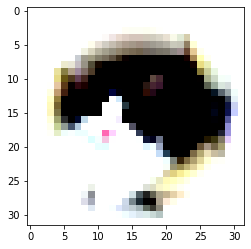

In [18]:
img, label = data_set[50]
pyplot.imshow(img.permute(1,2,0))
classes[label]

In [19]:
img_input = img.view(-1).unsqueeze(0)
out = model(img_input)
out

tensor([[-4.6653, -0.0095]], grad_fn=<LogSoftmaxBackward>)

In [20]:
index = torch.max(out, dim=1)[1]

print(f'Label:    {classes[label]}')
print(f'Predict:  {classes[index]}')

Label:    cat
Predict:  cat


## Modelo Conectado

In [15]:
train_loader = DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(nn_inputs, nn_outputs),
    nn.Tanh(),
    nn.Linear(nn_outputs, 2),
    nn.LogSoftmax(dim=1)
    )

optimizer = SGD(model.parameters(), lr=0.02)

loss_function = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch}')
    print(f'Loss:  {float(loss)}\n')


Epoch: 0
Loss:  0.4024346172809601

Epoch: 1
Loss:  0.44303447008132935

Epoch: 2
Loss:  0.6092448234558105

Epoch: 3
Loss:  0.35971248149871826

Epoch: 4
Loss:  0.2878648340702057

Epoch: 5
Loss:  0.4313012659549713

Epoch: 6
Loss:  0.4882659614086151

Epoch: 7
Loss:  0.09258978813886642

Epoch: 8
Loss:  0.2234230488538742

Epoch: 9
Loss:  0.141645610332489

Epoch: 10
Loss:  0.4133851230144501

Epoch: 11
Loss:  0.4073570668697357

Epoch: 12
Loss:  0.2987154424190521

Epoch: 13
Loss:  0.1028415858745575

Epoch: 14
Loss:  0.07936707884073257

Epoch: 15
Loss:  0.1538160890340805

Epoch: 16
Loss:  0.11364239454269409

Epoch: 17
Loss:  0.08031997084617615

Epoch: 18
Loss:  0.10850872099399567

Epoch: 19
Loss:  0.06773708760738373

Epoch: 20
Loss:  0.024448994547128677

Epoch: 21
Loss:  0.04802236706018448

Epoch: 22
Loss:  0.03422548249363899

Epoch: 23
Loss:  0.06440182030200958

Epoch: 24
Loss:  0.0716443732380867

Epoch: 25
Loss:  0.04046756029129028

Epoch: 26
Loss:  0.0203767791390419

In [16]:
out = model(img_input)

index = torch.max(out, dim=1)[1]

print(f'Label:    {classes[label]}')
print(f'Predict:  {classes[index]}')

Label:    car
Predict:  car


In [17]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.865000


In [22]:
tensorX = torch.tensor([1, 2, 3, 4])
print(torch.unsqueeze(tensorX, 1))
tensorX = torch.tensor([1, 2, 3, 4])
print(torch.unsqueeze(tensorX, 1))

tensor([[1],
        [2],
        [3],
        [4]])
tensor([[1],
        [2],
        [3],
        [4]])
